In [5]:
from mmseg.apis import init_model,inference_model, show_result_pyplot
import sys
import os
import matplotlib.pyplot as plt
mmseg_path = "../../submodules/mmsegmentation/"
sys.path.append(mmseg_path)

In [6]:
#create a dictionary of configurations and their respective checkpoints
configs = [
    {
        "config_name":"unet-s5-d16_deeplabv3_4xb4-40k_DME-64x64.py",
        "checkpoint":"deeplabv3_unet_s5-d16_64x64_40k_drive_20201226_094047-0671ff20.pth"
    },
    {
        "config_name":"unet-s5-d16_deeplabv3_4xb4-ce-1.0-dice-3.0-40k_DME-64x64.py",
        "checkpoint":"deeplabv3_unet_s5-d16_ce-1.0-dice-3.0_64x64_40k_drive_20211210_201825-6bf0efd7.pth"
    },
    {
        "config_name": "unet-s5-d16_fcn_4xb4-40k_DME-64x64.py",
        "checkpoint": "fcn_unet_s5-d16_64x64_40k_drive_20201223_191051-5daf6d3b.pth"
    },
    {
        "config_name": "unet-s5-d16_fcn_4xb4-ce-1.0-dice-3.0-40k_DME-64x64.py",
        "checkpoint":"fcn_unet_s5-d16_ce-1.0-dice-3.0_64x64_40k_drive_20211210_201820-785de5c2.pth"
    },
    {
        "config_name":"unet-s5-d16_pspnet_4xb4-40k_DME-64x64.py",
        "checkpoint":"pspnet_unet_s5-d16_64x64_40k_drive_20201227_181818-aac73387.pth"
    },
    {
        "config_name":"unet-s5-d16_pspnet_4xb4-ce-1.0-dice-3.0-40k_DME-64x64.py",
        "checkpoint":"pspnet_unet_s5-d16_ce-1.0-dice-3.0_64x64_40k_drive_20211210_201821-22b3e3ba.pth"
    }
]

In [7]:
#initialize the configuration file
config_idx = 3
config_folder = "ece661"
config_name = configs[config_idx]["config_name"]
cfg_path = os.path.join(mmseg_path,"configs",config_folder,config_name)

#set the working directory
work_dir = os.path.join(mmseg_path,'work_dirs',config_name)

#set the checkpoint to load from - for pre-trained models
# checkpoint_name = configs[config_idx]["checkpoint"]
# checkpoint_path = os.path.join(mmseg_path,'checkpoints',checkpoint_name)

#load checkpoint - for fine-tuned models
checkpoint_name = "iter_8000.pth"
checkpoint_path = os.path.join(work_dir,checkpoint_name)

#build the model
model = init_model(cfg_path,checkpoint_path)

/home/david/Documents/ECE661_mmSeg/submodules/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/home/david/Documents/ECE661_mmSeg/submodules/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/david/Documents/ECE661_mmSeg/submodules/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../../submodules/mmsegmentation/work_dirs/unet-s5-d16_fcn_4xb4-ce-1.0-dice-3.0-40k_DME-64x64.py/iter_8000.pth


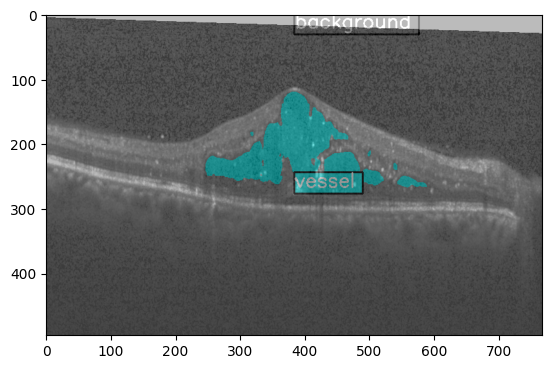

In [8]:
img = "0005.png"
dataset_path = "/data/david/DME/images/validation/"
img_path = os.path.join(dataset_path,img)

result = inference_model(model,img_path)

save_path = os.path.join(work_dir,img)
vis_image = show_result_pyplot(model,img_path,result,out_file=save_path)

plt.imshow(vis_image)